In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# show the overall survival rate (38.38), as the standard when choosing the fts
print('Overall Survival Rate:',train['Survived'].mean())

Overall Survival Rate: 0.3838383838383838


In [27]:
# get_dummies function
def dummies(col,train,test):
    train_dum = pd.get_dummies(train[col])
    test_dum = pd.get_dummies(test[col])
    train = pd.concat([train, train_dum], axis=1)
    test = pd.concat([test,test_dum],axis=1)
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)
    return train, test

# get rid of the useless cols
dropping = ['PassengerId', 'Name', 'Ticket']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)

3    491
1    216
2    184
Name: Pclass, dtype: int64


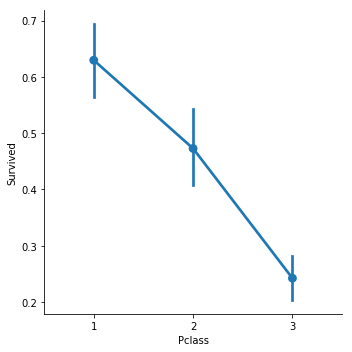

In [28]:
#pclass
# ensure no na contained
print(train.Pclass.value_counts(dropna=False))
sns.factorplot('Pclass', 'Survived',data=train, order=[1,2,3])
# according to the graph, we found there are huge differences between
# each pclass group. keep the ft
train, test = dummies('Pclass', train, test)

male      577
female    314
Name: Sex, dtype: int64


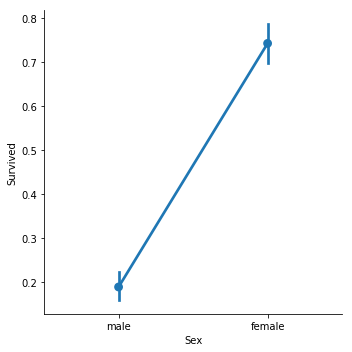

In [29]:
# sex
print(train.Sex.value_counts(dropna=False))
sns.factorplot('Sex','Survived', data=train)
# female survival rate is way better than the male
train, test = dummies('Sex', train, test)
# cos the male survival rate is so low, delete the male col
train.drop('male',axis=1,inplace=True)
test.drop('male',axis=1,inplace=True)

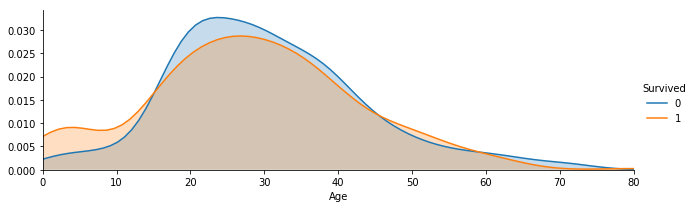

In [30]:
#age 
#dealing the missing data
nan_num = train['Age'].isnull().sum()
# there are 177 missing value, fill with random int
age_mean = train['Age'].mean()
age_std = train['Age'].std()
filling = np.random.randint(age_mean-age_std, age_mean+age_std, size=nan_num)
train['Age'][train['Age'].isnull()==True] = filling
nan_num = train['Age'].isnull().sum()

# dealing the missing val in test
nan_num = test['Age'].isnull().sum()
# 86 null
age_mean = test['Age'].mean()
age_std = test['Age'].std()
filling = np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num)
test['Age'][test['Age'].isnull()==True]=filling
nan_num = test['Age'].isnull().sum()

#look into the age col
s = sns.FacetGrid(train,hue='Survived',aspect=3)
s.map(sns.kdeplot,'Age',shade=True)
s.set(xlim=(0,train['Age'].max()))
s.add_legend()

# from the graph, we see that the survival rate of children
# is higher than other and the 15-30 survival rate is lower
def under15(row):
    result = 0.0
    if row<15:
        result = 1.0
    return result
def young(row):
    result = 0.0
    if row>=15 and row<30:
        result = 1.0
    return result

train['under15'] = train['Age'].apply(under15)
test['under15'] = test['Age'].apply(under15)
train['young'] = train['Age'].apply(young)
test['young'] = test['Age'].apply(young)

train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


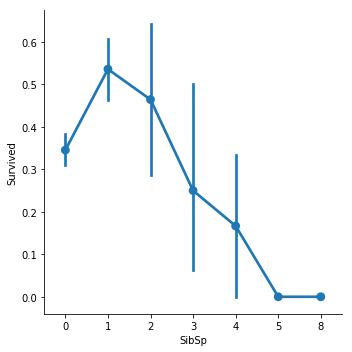

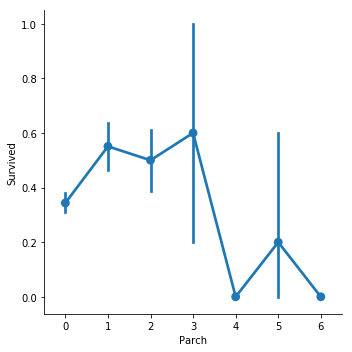

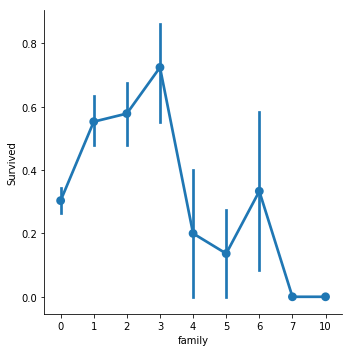

In [31]:
#family
# chek
print(train['SibSp'].value_counts(dropna=False))
print(train['Parch'].value_counts(dropna=False))

sns.factorplot('SibSp','Survived',data=train,size=5)
sns.factorplot('Parch','Survived',data=train,size=5)

'''through the plot, we suggest that with more family member, 
the survival rate will drop, we can create the new col
add up the parch and sibsp to check our theory''' 
train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']
sns.factorplot('family','Survived',data=train,size=5)

train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

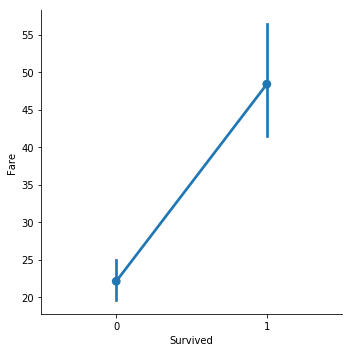

In [32]:
# fare
# checking null, found one in test group. leave it alone til we find out
# wether we should use this ft
train.Fare.isnull().sum()
test.Fare.isnull().sum()

sns.factorplot('Survived','Fare',data=train,size=5)
#according to the plot, smaller fare has higher survival rate, keep it
#dealing the null val in test
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [33]:
#Cabin
# checking missing val
# 687 out of 891 are missing, drop this col
train.Cabin.isnull().sum()
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

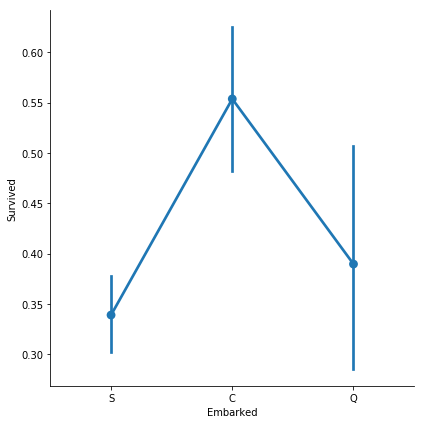

In [34]:
#Embark
train.Embarked.isnull().sum()
# 2 missing value
train.Embarked.value_counts()
# fill the majority val,'s', into missing val col
train['Embarked'].fillna('S',inplace=True)

sns.factorplot('Embarked','Survived',data=train,size=6)
# c has higher survival rate, drop the other two
train,test = dummies('Embarked',train,test)
train.drop(['S','Q'],axis=1,inplace=True)
test.drop(['S','Q'],axis=1,inplace=True)

In [36]:
'''
According to the accuracy chart, 'features test4 with svc'
got best performance
'''  
#test4 svc as submission
svc = SVC()
svc.fit(train_ft_4,train_y)
svc_pred = svc.predict(test_4)
print(svc.score(train_ft_4,train_y))


test = pd.read_csv('titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": svc_pred
    })
#submission.to_csv("kaggle.csv", index=False)

0.8327721661054994
